In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize
     

In [2]:
# create an independent variable 
x = np.linspace(-10, 30, 100)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = 10 + 4*x + e

df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-24.184053
1,-9.595960,-10.184676
2,-9.191919,-18.183182
3,-8.787879,-17.333487
4,-8.383838,-15.315870


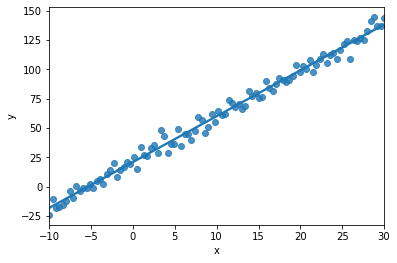

In [3]:
# visualize data distribution
sns.regplot(x='x', y='y', data = df)
plt.show()

In [4]:
def MLE_Norm(parameters):
    
  const, beta, std_dev = parameters

  # predict the output
  pred = const + beta*x

  # Calculate the log-likelihood for normal distribution  
  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))

  # Calculate the negative log-likelihood
  neg_LL = -1*LL
  return neg_LL

In [5]:
# Minimize the negative log-likelihood of the generated data 
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 300.8404808172805
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.53477218e-04, -1.27897693e-03,  7.38964450e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 244
      nit: 38
     njev: 61
   status: 0
  success: True
        x: array([20.9687384 ,  3.91308145,  4.90114168])